# Importing Packages

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preperation

## Loading the Data

In [3]:
(X_train, y_train),(X_test,y_test) = fashion_mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
y_test.shape

(10000,)

### Preprocessing the Data

In [8]:
X_train = X_train.reshape(-1,28*28).astype('float32')/255
X_test = X_test.reshape(-1,28*28).astype('float32')/255
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

# Building a Model

## Defining the Feedforward Neural Network

In [40]:
model = Sequential([
    Dense(256, input_shape=(784,), activation ='relu', name='L1'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(128, activation ='relu', name='L2'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(64, activation ='relu', name='L3'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(10, activation ='softmax', name='L4')
], name = 'FeedForward'
)

## Compiling the model

In [38]:
model.compile(
    optimizer ='adam',
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

## Train the model 

In [39]:
history = model.fit(X_train, y_train, 
                    epochs=20, 
                    batch_size=128, 
                    validation_split = 0.2, 
)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.6840 - accuracy: 0.7621 - val_loss: 0.4659 - val_accuracy: 0.8267
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.4826 - accuracy: 0.8293 - val_loss: 0.4204 - val_accuracy: 0.8461
Epoch 3/20
375/375 [==============================] - 1s 4ms/step - loss: 0.4456 - accuracy: 0.8435 - val_loss: 0.3714 - val_accuracy: 0.8648
Epoch 4/20
375/375 [==============================] - 2s 4ms/step - loss: 0.4261 - accuracy: 0.8474 - val_loss: 0.3886 - val_accuracy: 0.8594
Epoch 5/20
375/375 [==============================] - 2s 4ms/step - loss: 0.4083 - accuracy: 0.8546 - val_loss: 0.3611 - val_accuracy: 0.8698
Epoch 6/20
375/375 [==============================] - 1s 4ms/step - loss: 0.3942 - accuracy: 0.8576 - val_loss: 0.3735 - val_accuracy: 0.8618
Epoch 7/20
375/375 [==============================] - 1s 4ms/step - loss: 0.3891 - accuracy: 0.8593 - val_loss: 0.3592 - val_accuracy: 0.8691
Epoch 

# Evaluating the model

In [20]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose =0)
print(f"Test Accuracy: {test_accuracy: .4f}")

Test Accuracy:  0.8800


## Predictions

In [21]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred,axis =1)
y_true_classes = np.argmax(y_test,axis =1)

313/313 [==============================] - 1s 2ms/step


## Classification Report

In [23]:
print("Classiffication Report:\n", classification_report(y_true_classes,y_pred_classes,target_names=[ 
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot" 
    ]))

Classiffication Report:
               precision    recall  f1-score   support

 T-shirt/top       0.81      0.85      0.83      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.82      0.76      0.79      1000
       Dress       0.89      0.86      0.87      1000
        Coat       0.78      0.81      0.80      1000
      Sandal       0.99      0.95      0.97      1000
       Shirt       0.67      0.70      0.69      1000
     Sneaker       0.94      0.95      0.95      1000
         Bag       0.98      0.97      0.97      1000
  Ankle boot       0.94      0.97      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [41]:
model.summary()

Model: "FeedForward"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 256)               200960    
                                                                 
 batch_normalization_12 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dropout_12 (Dropout)        (None, 256)               0         
                                                                 
 L2 (Dense)                  (None, 128)               32896     
                                                                 
 batch_normalization_13 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dropout_13 (Dropout)        (None, 128)               

## Confusion Matrix

In [15]:
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

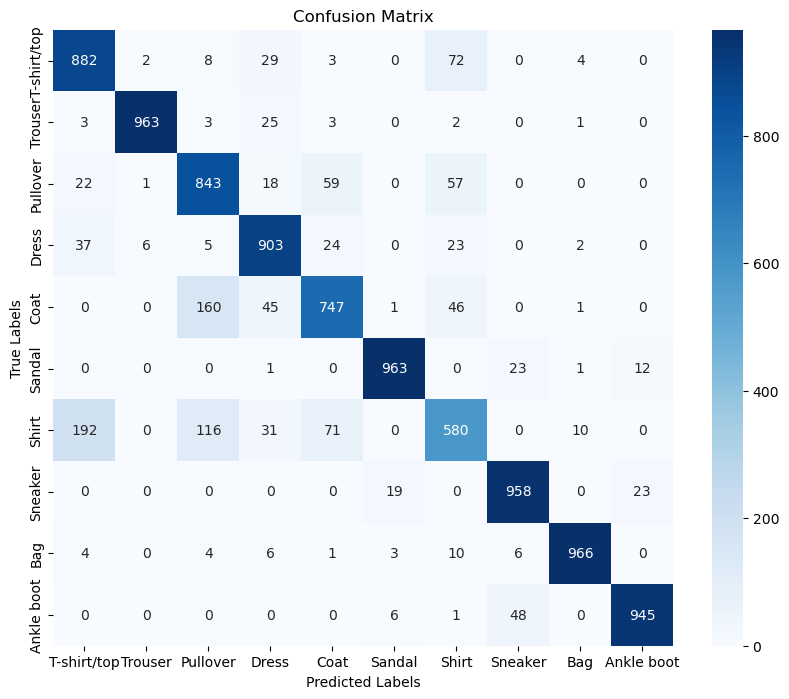

In [16]:
### Plotting the confusion Matrix
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',xticklabels =[
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
], yticklabels=[
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

### Plotting the training and validation accuracy and loss

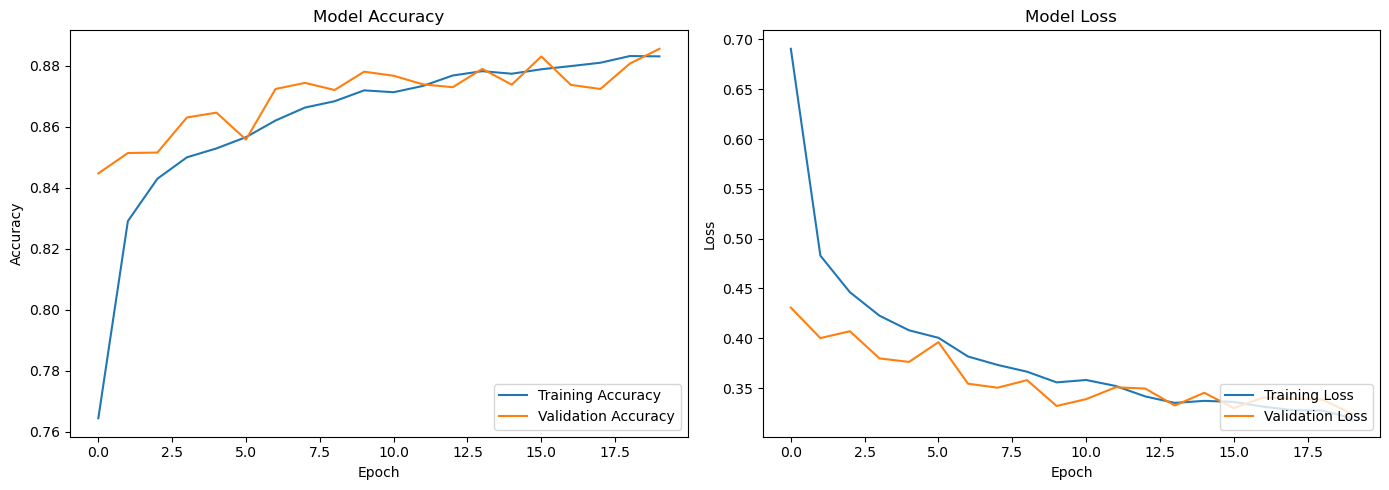

In [17]:
plt.figure(figsize=(14,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label ='Training Accuracy')
plt.plot(history.history['val_accuracy'],label ='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'],label ='Training Loss')
plt.plot(history.history['val_loss'],label ='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc = 'lower right')

plt.tight_layout()
plt.show()